In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


### 훈련 150, val 50, test50

In [5]:
# 데이터 경로 설정
base_dir = r"D:\Work\3rd_pj\K_Food_images"  # 전체 데이터가 있는 경로
output_dir = r"D:\Work\3rd_pj\K_Food_images_split"  # 분할 데이터를 저장할 경로
os.makedirs(output_dir, exist_ok=True)

# 고정된 데이터 개수
train_count = 150
val_count = 50
test_count = 50

# 이미지 파일 확장자 목록
image_extensions = {".jpg", ".jpeg", ".png"}

# 각 음식 대분류 폴더를 탐색
for category in tqdm(os.listdir(base_dir), desc="Processing categories"):  # 대분류 폴더 (e.g., 구이, 찜 등)
    category_path = os.path.join(base_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    # 음식 이름 폴더를 탐색
    for food in os.listdir(category_path):
        food_path = os.path.join(category_path, food)
        if not os.path.isdir(food_path):
            continue
        
        try:
            # 이미지 파일 리스트 필터링
            images = [f for f in os.listdir(food_path) 
                      if os.path.isfile(os.path.join(food_path, f)) and os.path.splitext(f)[1].lower() in image_extensions]
            
            # 이미지 개수 확인
            if len(images) < train_count + val_count + test_count:
                print(f"Skipping {category}/{food}: Not enough images.")
                continue

            # 고정된 개수로 훈련 데이터 분할 (150장)
            train_images, temp_images = train_test_split(images, train_size=train_count, random_state=42)

            # 나머지 이미지에서 검증 세트(50장)와 테스트 세트(50장) 분할
            val_images, test_images = train_test_split(temp_images, test_size=test_count, train_size=val_count, random_state=42)

            # 출력 경로 생성 및 이미지 복사
            for split, split_images in zip(["train", "val", "test"], [train_images, val_images, test_images]):
                split_dir = os.path.join(output_dir, split, category, food)
                os.makedirs(split_dir, exist_ok=True)
                
                for img in split_images:
                    src = os.path.join(food_path, img)
                    dst = os.path.join(split_dir, img)
                    shutil.copy(src, dst)

            print(f"Processed {category}/{food}: Train={len(train_images)}, Val={len(val_images)}, Test={len(test_images)}")

        except Exception as e:
            print(f"Error processing {category}/{food}: {e}")

print("데이터 분할 완료!")


Processing categories:   0%|          | 0/27 [00:00<?, ?it/s]

Processed 구이/갈비구이: Train=150, Val=50, Test=50
Processed 구이/갈치구이: Train=150, Val=50, Test=50
Processed 구이/고등어구이: Train=150, Val=50, Test=50
Processed 구이/곱창구이: Train=150, Val=50, Test=50
Processed 구이/닭갈비: Train=150, Val=50, Test=50
Processed 구이/더덕구이: Train=150, Val=50, Test=50
Processed 구이/떡갈비: Train=150, Val=50, Test=50
Processed 구이/불고기: Train=150, Val=50, Test=50
Processed 구이/삼겹살: Train=150, Val=50, Test=50
Processed 구이/장어구이: Train=150, Val=50, Test=50
Processed 구이/조개구이: Train=150, Val=50, Test=50
Processed 구이/조기구이: Train=150, Val=50, Test=50
Processed 구이/황태구이: Train=150, Val=50, Test=50


Processing categories:   4%|▎         | 1/27 [01:43<44:54, 103.63s/it]

Processed 구이/훈제오리: Train=150, Val=50, Test=50
Processed 국/계란국: Train=150, Val=50, Test=50
Processed 국/떡국_만두국: Train=150, Val=50, Test=50
Processed 국/무국: Train=150, Val=50, Test=50
Processed 국/미역국: Train=150, Val=50, Test=50
Processed 국/북엇국: Train=150, Val=50, Test=50
Processed 국/시래기국: Train=150, Val=50, Test=50
Processed 국/육개장: Train=150, Val=50, Test=50


Processing categories:   7%|▋         | 2/27 [03:29<43:45, 105.02s/it]

Processed 국/콩나물국: Train=150, Val=50, Test=50
Processed 기타/과메기: Train=150, Val=50, Test=50
Processed 기타/양념치킨: Train=150, Val=50, Test=50
Processed 기타/젓갈: Train=150, Val=50, Test=50
Processed 기타/콩자반: Train=150, Val=50, Test=50
Processed 기타/편육: Train=150, Val=50, Test=50
Processed 기타/피자: Train=150, Val=50, Test=50


Processing categories:  11%|█         | 3/27 [05:07<40:45, 101.88s/it]

Processed 기타/후라이드치킨: Train=150, Val=50, Test=50
Processed 김치/갓김치: Train=150, Val=50, Test=50
Processed 김치/깍두기: Train=150, Val=50, Test=50
Processed 김치/나박김치: Train=150, Val=50, Test=50
Processed 김치/무생채: Train=150, Val=50, Test=50
Processed 김치/배추김치: Train=150, Val=50, Test=50
Processed 김치/백김치: Train=150, Val=50, Test=50
Processed 김치/부추김치: Train=150, Val=50, Test=50
Processed 김치/열무김치: Train=150, Val=50, Test=50
Processed 김치/오이소박이: Train=150, Val=50, Test=50
Processed 김치/총각김치: Train=150, Val=50, Test=50


Processing categories:  15%|█▍        | 4/27 [07:03<41:10, 107.39s/it]

Processed 김치/파김치: Train=150, Val=50, Test=50
Processed 나물/가지볶음: Train=150, Val=50, Test=50
Processed 나물/고사리나물: Train=150, Val=50, Test=50
Processed 나물/미역줄기볶음: Train=150, Val=50, Test=50
Processed 나물/숙주나물: Train=150, Val=50, Test=50
Processed 나물/시금치나물: Train=150, Val=50, Test=50


Processing categories:  19%|█▊        | 5/27 [07:56<32:11, 87.79s/it] 

Processed 나물/애호박볶음: Train=150, Val=50, Test=50
Processed 떡/경단: Train=150, Val=50, Test=50
Processed 떡/꿀떡: Train=150, Val=50, Test=50


Processing categories:  22%|██▏       | 6/27 [08:21<23:16, 66.50s/it]

Processed 떡/송편: Train=150, Val=50, Test=50


Processing categories:  26%|██▌       | 7/27 [08:29<15:43, 47.17s/it]

Processed 만두/만두: Train=150, Val=50, Test=50
Processed 면/라면: Train=150, Val=50, Test=50
Processed 면/막국수: Train=150, Val=50, Test=50
Processed 면/물냉면: Train=150, Val=50, Test=50
Processed 면/비빔냉면: Train=150, Val=50, Test=50
Processed 면/수제비: Train=150, Val=50, Test=50
Processed 면/열무국수: Train=150, Val=50, Test=50
Processed 면/잔치국수: Train=150, Val=50, Test=50
Processed 면/짜장면: Train=150, Val=50, Test=50
Processed 면/짬뽕: Train=150, Val=50, Test=50
Processed 면/쫄면: Train=150, Val=50, Test=50
Processed 면/칼국수: Train=150, Val=50, Test=50


Processing categories:  30%|██▉       | 8/27 [10:16<20:58, 66.24s/it]

Processed 면/콩국수: Train=150, Val=50, Test=50
Processed 무침/꽈리고추무침: Train=150, Val=50, Test=50
Processed 무침/도라지무침: Train=150, Val=50, Test=50
Processed 무침/도토리묵: Train=150, Val=50, Test=50
Processed 무침/잡채: Train=150, Val=50, Test=50
Processed 무침/콩나물무침: Train=150, Val=50, Test=50
Processed 무침/홍어무침: Train=150, Val=50, Test=50


Processing categories:  33%|███▎      | 9/27 [11:14<19:05, 63.66s/it]

Processed 무침/회무침: Train=150, Val=50, Test=50
Processed 밥/김밥: Train=150, Val=50, Test=50
Processed 밥/김치볶음밥: Train=150, Val=50, Test=50
Processed 밥/누룽지: Train=150, Val=50, Test=50
Processed 밥/비빔밥: Train=150, Val=50, Test=50
Processed 밥/새우볶음밥: Train=150, Val=50, Test=50
Processed 밥/알밥: Train=150, Val=50, Test=50
Processed 밥/유부초밥: Train=150, Val=50, Test=50
Processed 밥/잡곡밥: Train=150, Val=50, Test=50


Processing categories:  37%|███▋      | 10/27 [12:26<18:48, 66.35s/it]

Processed 밥/주먹밥: Train=150, Val=50, Test=50
Processed 볶음/감자채볶음: Train=150, Val=50, Test=50
Processed 볶음/건새우볶음: Train=150, Val=50, Test=50
Processed 볶음/고추장진미채볶음: Train=150, Val=50, Test=50
Processed 볶음/두부김치: Train=150, Val=50, Test=50
Processed 볶음/떡볶이: Train=150, Val=50, Test=50
Processed 볶음/라볶이: Train=150, Val=50, Test=50
Processed 볶음/멸치볶음: Train=150, Val=50, Test=50
Processed 볶음/소세지볶음: Train=150, Val=50, Test=50
Processed 볶음/어묵볶음: Train=150, Val=50, Test=50
Processed 볶음/오징어채볶음: Train=150, Val=50, Test=50
Processed 볶음/제육볶음: Train=150, Val=50, Test=50


Processing categories:  41%|████      | 11/27 [13:31<17:31, 65.74s/it]

Processed 볶음/주꾸미볶음: Train=150, Val=50, Test=50


Processing categories:  44%|████▍     | 12/27 [13:35<11:46, 47.10s/it]

Processed 쌈/보쌈: Train=150, Val=50, Test=50
Processed 음청류/수정과: Train=150, Val=50, Test=50


Processing categories:  48%|████▊     | 13/27 [13:48<08:34, 36.74s/it]

Processed 음청류/식혜: Train=150, Val=50, Test=50
Processed 장/간장게장: Train=150, Val=50, Test=50


Processing categories:  52%|█████▏    | 14/27 [14:01<06:26, 29.75s/it]

Processed 장/양념게장: Train=150, Val=50, Test=50


Processing categories:  56%|█████▌    | 15/27 [14:08<04:32, 22.72s/it]

Processed 장아찌/깻잎장아찌: Train=150, Val=50, Test=50


Processing categories:  59%|█████▉    | 16/27 [14:14<03:15, 17.79s/it]

Processed 적/떡꼬치: Train=150, Val=50, Test=50
Processed 전/감자전: Train=150, Val=50, Test=50
Processed 전/계란말이: Train=150, Val=50, Test=50
Processed 전/계란후라이: Train=150, Val=50, Test=50
Processed 전/김치전: Train=150, Val=50, Test=50
Processed 전/동그랑땡: Train=150, Val=50, Test=50
Processed 전/생선전: Train=150, Val=50, Test=50
Processed 전/파전: Train=150, Val=50, Test=50


Processing categories:  63%|██████▎   | 17/27 [15:12<04:57, 29.74s/it]

Processed 전/호박전: Train=150, Val=50, Test=50


Processing categories:  67%|██████▋   | 18/27 [15:18<03:24, 22.72s/it]

Processed 전골/곱창전골: Train=150, Val=50, Test=50
Processed 조림/갈치조림: Train=150, Val=50, Test=50
Processed 조림/감자조림: Train=150, Val=50, Test=50
Processed 조림/고등어조림: Train=150, Val=50, Test=50
Processed 조림/꽁치조림: Train=150, Val=50, Test=50
Processed 조림/두부조림: Train=150, Val=50, Test=50
Processed 조림/땅콩조림: Train=150, Val=50, Test=50
Processed 조림/메추리알장조림: Train=150, Val=50, Test=50
Processed 조림/연근조림: Train=150, Val=50, Test=50
Processed 조림/우엉조림: Train=150, Val=50, Test=50
Processed 조림/장조림: Train=150, Val=50, Test=50


Processing categories:  70%|███████   | 19/27 [16:40<05:23, 40.49s/it]

Processed 조림/코다리조림: Train=150, Val=50, Test=50
Processed 죽/전복죽: Train=150, Val=50, Test=50


Processing categories:  74%|███████▍  | 20/27 [16:55<03:49, 32.75s/it]

Processed 죽/호박죽: Train=150, Val=50, Test=50
Processed 찌개/김치찌개: Train=150, Val=50, Test=50
Processed 찌개/닭계장: Train=150, Val=50, Test=50
Processed 찌개/동태찌개: Train=150, Val=50, Test=50
Processed 찌개/된장찌개: Train=150, Val=50, Test=50


Processing categories:  78%|███████▊  | 21/27 [17:33<03:26, 34.47s/it]

Processed 찌개/순두부찌개: Train=150, Val=50, Test=50
Processed 찜/갈비찜: Train=150, Val=50, Test=50
Processed 찜/계란찜: Train=150, Val=50, Test=50
Processed 찜/김치찜: Train=150, Val=50, Test=50
Processed 찜/꼬막찜: Train=150, Val=50, Test=50
Processed 찜/닭볶음탕: Train=150, Val=50, Test=50
Processed 찜/수육: Train=150, Val=50, Test=50
Processed 찜/순대: Train=150, Val=50, Test=50
Processed 찜/족발: Train=150, Val=50, Test=50
Processed 찜/찜닭: Train=150, Val=50, Test=50


Processing categories:  81%|████████▏ | 22/27 [18:59<04:09, 49.97s/it]

Processed 찜/해물찜: Train=150, Val=50, Test=50
Processed 탕/갈비탕: Train=150, Val=50, Test=50
Processed 탕/감자탕: Train=150, Val=50, Test=50
Processed 탕/곰탕_설렁탕: Train=150, Val=50, Test=50
Processed 탕/매운탕: Train=150, Val=50, Test=50
Processed 탕/삼계탕: Train=150, Val=50, Test=50


Processing categories:  85%|████████▌ | 23/27 [19:49<03:19, 49.90s/it]

Processed 탕/추어탕: Train=150, Val=50, Test=50
Processed 튀김/고추튀김: Train=150, Val=50, Test=50
Processed 튀김/새우튀김: Train=150, Val=50, Test=50


Processing categories:  89%|████████▉ | 24/27 [20:13<02:06, 42.16s/it]

Processed 튀김/오징어튀김: Train=150, Val=50, Test=50
Processed 한과/약과: Train=150, Val=50, Test=50
Processed 한과/약식: Train=150, Val=50, Test=50


Processing categories:  93%|█████████▎| 25/27 [20:40<01:14, 37.46s/it]

Processed 한과/한과: Train=150, Val=50, Test=50
Processed 해물/멍게: Train=150, Val=50, Test=50


Processing categories:  96%|█████████▋| 26/27 [20:55<00:30, 30.81s/it]

Processed 해물/산낙지: Train=150, Val=50, Test=50
Processed 회/물회: Train=150, Val=50, Test=50


Processing categories: 100%|██████████| 27/27 [21:11<00:00, 47.09s/it]

Processed 회/육회: Train=150, Val=50, Test=50
데이터 분할 완료!


In [58]:
# 데이터 경로 설정
train_dir = r"D:\Work\3rd_pj\K_Food_images_split\train"
val_dir = r"D:\Work\3rd_pj\K_Food_images_split\val"
test_dir = r"D:\Work\3rd_pj\K_Food_images_split\test"

# 데이터 전처리 (이미지 증강 없이)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 22500 images belonging to 150 classes.
Found 7500 images belonging to 150 classes.
Found 7500 images belonging to 150 classes.


In [59]:
print("훈련 데이터 샘플 수:", train_generator.samples)
print("검증 데이터 샘플 수:", val_generator.samples)
print("테스트 데이터 샘플 수:", test_generator.samples)

print("훈련 데이터 클래스 수:", train_generator.num_classes)
print("검증 데이터 클래스 수:", val_generator.num_classes)
print("테스트 데이터 클래스 수:", test_generator.num_classes)

훈련 데이터 샘플 수: 22500
검증 데이터 샘플 수: 7500
테스트 데이터 샘플 수: 7500
훈련 데이터 클래스 수: 150
검증 데이터 클래스 수: 150
테스트 데이터 클래스 수: 150


In [19]:
# ResNet50 바디 (특징 추출기)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 바디 고정 (필요시 True로 설정하여 미세 조정 가능)

# Functional API로 모델 구성
inputs = tf.keras.Input(shape=(224, 224, 3))  # 입력 레이어
x = base_model(inputs, training=False)        # ResNet50 특징 추출기 (training=False로 고정)
x = layers.GlobalMaxPooling2D()(x)            # 글로벌 맥스 풀링
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(train_generator.num_classes, activation='softmax')(x)  # 출력층

model = models.Model(inputs=inputs, outputs=outputs)  # 모델 정의

# 모델 요약 출력
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_5 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                           

In [20]:
# 모델 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# EarlyStopping 콜백 설정
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # 검증 손실을 모니터링
    patience=10,          # 개선되지 않는 에포크를 5회 허용
    restore_best_weights=True  # 가장 좋은 가중치를 복원
)

In [23]:
# 모델 학습
history = model.fit(
    train_generator,
    epochs=100,  # 에포크를 50으로 설정
    validation_data=val_generator,
    callbacks=[early_stopping]  # EarlyStopping 추가
)

Epoch 1/100
259/704 [==========>...................] - ETA: 12:22 - loss: 5.1148 - accuracy: 0.0076

c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


704/704 [==============================] - 1574s 2s/step - loss: 5.0524 - accuracy: 0.0069 - val_loss: 5.0107 - val_accuracy: 0.0067
Epoch 2/100
704/704 [==============================] - 1360s 2s/step - loss: 5.0140 - accuracy: 0.0062 - val_loss: 5.0107 - val_accuracy: 0.0067
Epoch 3/100
704/704 [==============================] - 1356s 2s/step - loss: 5.0121 - accuracy: 0.0059 - val_loss: 5.0109 - val_accuracy: 0.0067
Epoch 4/100
704/704 [==============================] - 1358s 2s/step - loss: 5.0130 - accuracy: 0.0062 - val_loss: 5.0107 - val_accuracy: 0.0067
Epoch 5/100
704/704 [==============================] - 1359s 2s/step - loss: 5.0124 - accuracy: 0.0056 - val_loss: 5.0107 - val_accuracy: 0.0067
Epoch 6/100
704/704 [==============================] - 1358s 2s/step - loss: 5.0120 - accuracy: 0.0048 - val_loss: 5.0107 - val_accuracy: 0.0067
Epoch 7/100
704/704 [==============================] - 1361s 2s/step - loss: 5.0120 - accuracy: 0.0049 - val_loss: 5.0107 - val_accuracy: 0.00

In [24]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)  # 소수점을 자르지 않고 출력

 95/235 [===========>..................] - ETA: 3:26 - loss: 5.0101 - accuracy: 0.0000e+00

c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


217/235 [==========================>...] - ETA: 26s - loss: 5.0106 - accuracy: 0.0072

c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


235/235 [==============================] - 345s 1s/step - loss: 5.0106 - accuracy: 0.0067
Test Accuracy: 0.006666666828095913


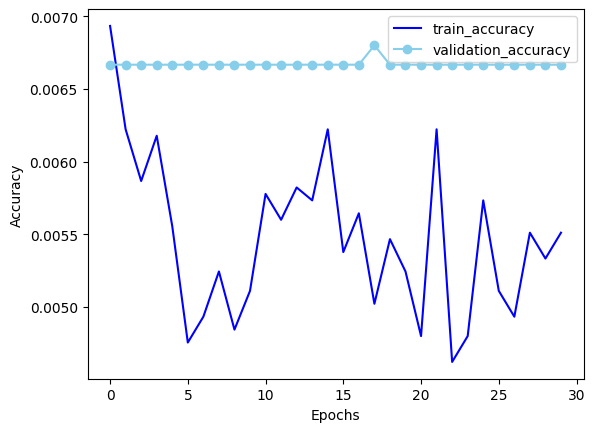

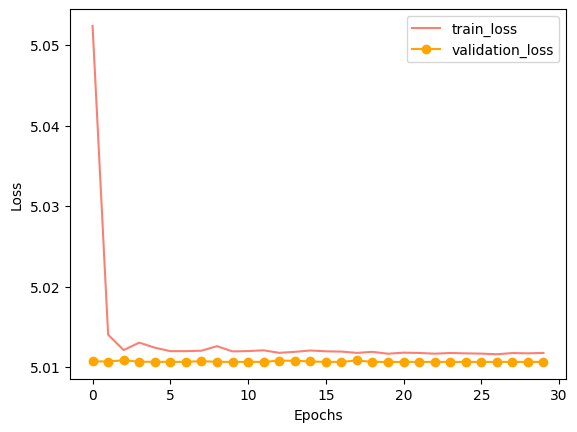

In [25]:
# 학습 및 검증 정확도 그래프
plt.plot(history.epoch, history.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(history.epoch, history.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 학습 및 검증 손실 그래프
plt.plot(history.epoch, history.history['loss'], label = "train_loss", c='salmon')
plt.plot(history.epoch, history.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### EfficientNetB0

In [63]:
# EfficientNetB0 모델 불러오기 (include_top=False)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# block7 이후부터 학습 가능하도록 설정
freeze_until_block7 = False  # False이면 동결 시작, True이면 학습 가능 시작

# 모든 레이어를 동결(freeze) 시킴
for layer in base_model.layers:
    layer.trainable = False

# block7 레이어 이후부터 학습 가능하도록 설정
start_fine_tuning = False  # True로 설정하면 block7부터 학습 가능

# block7a_expand_conv 부터 학습 가능하도록 설정
for layer in base_model.layers:
    if layer.name == 'block7a_expand_conv':  # block7a_expand_conv부터 학습 가능
        start_fine_tuning = True
    if start_fine_tuning:
        layer.trainable = True

In [64]:
# 입력 텐서 정의
inputs = layers.Input(shape=(224, 224, 3))

# base_model의 출력을 특징 추출기로 사용
x = base_model(inputs, training=False)

# 모델 헤드 구성
x = GlobalMaxPooling2D()(x)            # 글로벌 맥스 풀링
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# 최종 모델 구성
model1_2 = Model(inputs=inputs, outputs=predictions)

In [65]:
# 모델 컴파일
model1_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [66]:
# 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5', save_best_only=True, monitor='val_loss', verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [67]:
# 학습
history1_2 = model1_2.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
252/704 [=========>....................] - ETA: 5:45 - loss: 5.1004 - accuracy: 0.0052

c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


704/704 [==============================] - ETA: 0s - loss: 5.0445 - accuracy: 0.0066
Epoch 1: val_loss improved from inf to 5.00802, saving model to best_model.h5


c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


704/704 [==============================] - 756s 1s/step - loss: 5.0445 - accuracy: 0.0066 - val_loss: 5.0080 - val_accuracy: 0.0083 - lr: 0.0010
Epoch 2/50
704/704 [==============================] - ETA: 0s - loss: 4.8898 - accuracy: 0.0117
Epoch 2: val_loss improved from 5.00802 to 4.71473, saving model to best_model.h5
704/704 [==============================] - 698s 991ms/step - loss: 4.8898 - accuracy: 0.0117 - val_loss: 4.7147 - val_accuracy: 0.0163 - lr: 0.0010
Epoch 3/50
704/704 [==============================] - ETA: 0s - loss: 4.7100 - accuracy: 0.0152
Epoch 3: val_loss improved from 4.71473 to 4.61983, saving model to best_model.h5
704/704 [==============================] - 795s 1s/step - loss: 4.7100 - accuracy: 0.0152 - val_loss: 4.6198 - val_accuracy: 0.0201 - lr: 0.0010
Epoch 4/50
704/704 [==============================] - ETA: 0s - loss: 4.6185 - accuracy: 0.0169
Epoch 4: val_loss improved from 4.61983 to 4.56702, saving model to best_model.h5
704/704 [===================

KeyboardInterrupt: 

In [ ]:
# 모델 평가
test_loss, test_acc = model1_2.evaluate(test_generator)
print("Test Accuracy:", test_acc)  # 소수점을 자르지 않고 출력

In [ ]:
# 학습 및 검증 정확도 그래프
plt.plot(history1_2.epoch, history1_2.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(history1_2.epoch, history1_2.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 학습 및 검증 손실 그래프
plt.plot(history1_2.epoch, history1_2.history['loss'], label = "train_loss", c='salmon')
plt.plot(history1_2.epoch, history1_2.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# train, val, test 이미지 수 늘려서 해보기

In [ ]:
# 원본 데이터셋 경로와 출력 폴더 설정
original_dir = r"D:\Work\3rd_pj\K_Food_images"
output_dir = r"D:\Work\3rd_pj\K_Food_images_split2"

# 출력 폴더 생성
sub_dirs = ['train2', 'val2', 'test2']
for sub_dir in sub_dirs:
    os.makedirs(os.path.join(output_dir, sub_dir), exist_ok=True)

# 이미지 확장자
image_extensions = ('.jpg', '.jpeg', '.png')

# 데이터 분할
for category in os.listdir(original_dir):  # 대분류 폴더
    category_path = os.path.join(original_dir, category)
    if not os.path.isdir(category_path):
        continue
    
    for food_name in os.listdir(category_path):  # 음식 이름 폴더
        food_path = os.path.join(category_path, food_name)
        if not os.path.isdir(food_path):
            continue
        
        # 음식 폴더의 이미지 파일 수집
        images = [f for f in os.listdir(food_path) if f.lower().endswith(image_extensions)]
        if len(images) < 980:
            print(f"Skipping {food_name} as it has less than 1000 images.")
            continue
        
        # 이미지 파일 섞기
        random.shuffle(images)
        
        # 분할
        train_images = images[:700]
        val_images = images[700:840]
        test_images = images[840:980]
        
        # 출력 폴더에 복사
        for subset, subset_images in zip(sub_dirs, [train_images, val_images, test_images]):
            subset_dir = os.path.join(output_dir, subset, food_name)  # 음식 이름 폴더 생성
            os.makedirs(subset_dir, exist_ok=True)
            for img in subset_images:
                shutil.copy(os.path.join(food_path, img), os.path.join(subset_dir, img))


In [4]:
import os
import random
import shutil

# 원본 데이터셋 경로와 출력 폴더 설정
original_dir = r"D:\Work\3rd_pj\K_Food_images"
output_dir = r"D:\Work\3rd_pj\K_Food_images_split2"

# 출력 폴더 생성
sub_dirs = ['train2', 'val2', 'test2']
for sub_dir in sub_dirs:
    os.makedirs(os.path.join(output_dir, sub_dir), exist_ok=True)

# 이미지 확장자
image_extensions = ('.jpg', '.jpeg', '.png')

# 갈비구이 폴더 경로
category = "구이"  # 대분류 폴더
food_name = "갈비구이"  # 음식 이름 폴더
food_path = os.path.join(original_dir, category, food_name)

if os.path.isdir(food_path):
    # 음식 폴더의 이미지 파일 수집
    images = [f for f in os.listdir(food_path) if f.lower().endswith(image_extensions)]
    if len(images) < 980:
        print(f"Skipping {food_name} as it has less than 1000 images.")
    else:
        # 이미지 파일 섞기
        random.shuffle(images)
        
        # 분할
        train_images = images[:700]
        val_images = images[700:840]
        test_images = images[840:980]
        
        # 출력 폴더에 복사
        for subset, subset_images in zip(sub_dirs, [train_images, val_images, test_images]):
            subset_dir = os.path.join(output_dir, subset, food_name)  # 음식 이름 폴더 생성
            os.makedirs(subset_dir, exist_ok=True)
            for img in subset_images:
                shutil.copy(os.path.join(food_path, img), os.path.join(subset_dir, img))
        print(f"Images for {food_name} have been successfully split.")
else:
    print(f"{food_path} does not exist or is not a directory.")

Images for 갈비구이 have been successfully split.


In [2]:
# 데이터 경로 설정
train_dir2 = r"D:\Work\3rd_pj\K_Food_images_split2\train2" 
val_dir2 = r"D:\Work\3rd_pj\K_Food_images_split2\val2" 
test_dir2 = r"D:\Work\3rd_pj\K_Food_images_split2\test2" 

# 데이터 전처리 (이미지 증강 없이)
train_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
val_test_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # 기본값 True
)

val_generator2 = val_test_datagen2.flow_from_directory(
    val_dir2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # 검증 데이터도 섞으려면 True
)

test_generator2 = val_test_datagen2.flow_from_directory(
    test_dir2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # 테스트 데이터는 섞지 않음
)

Found 105000 images belonging to 150 classes.
Found 21000 images belonging to 150 classes.
Found 21000 images belonging to 150 classes.


In [3]:
print("클래스 인덱스:", train_generator2.class_indices)
print("훈련 데이터 샘플 수:", train_generator2.samples)
print("검증 데이터 샘플 수:", val_generator2.samples)
print("테스트 데이터 샘플 수:", test_generator2.samples)

print("훈련 데이터 클래스 수:", train_generator2.num_classes)
print("검증 데이터 클래스 수:", val_generator2.num_classes)
print("테스트 데이터 클래스 수:", test_generator2.num_classes)

클래스 인덱스: {'가지볶음': 0, '간장게장': 1, '갈비구이': 2, '갈비찜': 3, '갈비탕': 4, '갈치구이': 5, '갈치조림': 6, '감자전': 7, '감자조림': 8, '감자채볶음': 9, '감자탕': 10, '갓김치': 11, '건새우볶음': 12, '경단': 13, '계란국': 14, '계란말이': 15, '계란찜': 16, '계란후라이': 17, '고등어구이': 18, '고등어조림': 19, '고사리나물': 20, '고추장진미채볶음': 21, '고추튀김': 22, '곰탕_설렁탕': 23, '곱창구이': 24, '곱창전골': 25, '과메기': 26, '김밥': 27, '김치볶음밥': 28, '김치전': 29, '김치찌개': 30, '김치찜': 31, '깍두기': 32, '깻잎장아찌': 33, '꼬막찜': 34, '꽁치조림': 35, '꽈리고추무침': 36, '꿀떡': 37, '나박김치': 38, '누룽지': 39, '닭갈비': 40, '닭계장': 41, '닭볶음탕': 42, '더덕구이': 43, '도라지무침': 44, '도토리묵': 45, '동그랑땡': 46, '동태찌개': 47, '된장찌개': 48, '두부김치': 49, '두부조림': 50, '땅콩조림': 51, '떡갈비': 52, '떡국_만두국': 53, '떡꼬치': 54, '떡볶이': 55, '라면': 56, '라볶이': 57, '막국수': 58, '만두': 59, '매운탕': 60, '멍게': 61, '메추리알장조림': 62, '멸치볶음': 63, '무국': 64, '무생채': 65, '물냉면': 66, '물회': 67, '미역국': 68, '미역줄기볶음': 69, '배추김치': 70, '백김치': 71, '보쌈': 72, '부추김치': 73, '북엇국': 74, '불고기': 75, '비빔냉면': 76, '비빔밥': 77, '산낙지': 78, '삼겹살': 79, '삼계탕': 80, '새우볶음밥': 81, '새우튀김': 82, '생선전': 83, '소세지볶음': 84, '송편'

### ResNet50

In [38]:
# ResNet50 바디 (특징 추출기)
base_model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 모든 레이어 동결 후, 마지막 30개 레이어만 훈련 가능하게 설정
base_model2.trainable = False
for layer in base_model2.layers[-30:]:
    layer.trainable = True

# Functional API로 모델 구성
inputs = tf.keras.Input(shape=(224, 224, 3))  # 입력 레이어
x = base_model2(inputs, training=False)        # ResNet50 특징 추출기 (training=False로 고정)
x = layers.GlobalMaxPooling2D()(x)            # 글로벌 맥스 풀링
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(train_generator2.num_classes, activation='softmax')(x)  # 출력층

model2 = models.Model(inputs=inputs, outputs=outputs)  # 모델 정의

# 모델 요약 출력
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_3 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              2098176   
                                                           

In [39]:
# 모델 컴파일
model2.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# EarlyStopping 콜백 설정
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # 검증 손실을 모니터링
    patience=10,          # 개선되지 않는 에포크를 5회 허용
    restore_best_weights=True  # 가장 좋은 가중치를 복원
)
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

In [ ]:
history2 = model2.fit(train_generator, epochs=100, 
                      validation_data=val_generator, 
                      callbacks=[early_stopping, lr_scheduler])

In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)  # 소수점을 자르지 않고 출력

In [ ]:
# 학습 및 검증 정확도 그래프
plt.plot(history2.epoch, history2.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(history2.epoch, history2.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 학습 및 검증 손실 그래프
plt.plot(history2.epoch, history2.history['loss'], label = "train_loss", c='salmon')
plt.plot(history2.epoch, history2.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### ResNet-101

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input

# 데이터 경로 설정
train_dir2 = r"D:\Work\3rd_pj\K_Food_images_split2\train2"
val_dir2 = r"D:\Work\3rd_pj\K_Food_images_split2\val2"
test_dir2 = r"D:\Work\3rd_pj\K_Food_images_split2\test2"

# 데이터 전처리 (이미지 증강 없이)
train_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)
val_test_datagen2 = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir2,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

val_generator2 = val_test_datagen2.flow_from_directory(
    val_dir2,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

test_generator2 = val_test_datagen2.flow_from_directory(
    test_dir2,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 105000 images belonging to 150 classes.
Found 21000 images belonging to 150 classes.
Found 21000 images belonging to 150 classes.


In [6]:
# 모델 정의
def create_model(num_classes):
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False  # Pre-trained 가중치 고정
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 모델 학습
def train_model():
    num_classes = 150  # 클래스 수
    model_rn101 = create_model(num_classes)  # 모델 생성

    # 옵티마이저 정의
    optimizer = tf.keras.optimizers.legacy.SGD(
        learning_rate=0.01, momentum=0.9, decay=0.0001
    )

    model_rn101.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # 콜백 설정
    early_stopping = EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
    )

    model_checkpoint = ModelCheckpoint(
        'best_model_rn101.h5', save_best_only=True, monitor='val_loss', verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, verbose=1
    )

    callbacks = [early_stopping, model_checkpoint, reduce_lr]

    # 학습
    model_rn101.fit(
        train_generator2,
        validation_data=val_generator2,
        epochs=50,
        callbacks=callbacks
    )

    # 테스트 데이터셋 평가
    print("\nEvaluating on the test dataset...")
    test_loss, test_accuracy = model_rn101.evaluate(test_generator2)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # 최종 모델 저장
    model_rn101.save('resnet101_korean_food_final.h5')


In [7]:
# 실행
train_model()



Epoch 1/50


  58/6563 [..............................] - ETA: 2:54:11 - loss: 5.8661 - accuracy: 0.0614

c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3021/6563 [============>.................] - ETA: 1:25:18 - loss: 3.7073 - accuracy: 0.4172

c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


6563/6563 [==============================] - ETA: 0s - loss: 3.1852 - accuracy: 0.4822
Epoch 1: val_loss improved from inf to 2.42743, saving model to best_model_rn101.h5


c:\Users\human\.conda\envs\human-dl-env2\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6563/6563 [==============================] - 10863s 2s/step - loss: 3.1852 - accuracy: 0.4822 - val_loss: 2.4274 - val_accuracy: 0.5714 - lr: 0.0100
Epoch 2/50
6563/6563 [==============================] - ETA: 0s - loss: 1.6513 - accuracy: 0.6475
Epoch 2: val_loss improved from 2.42743 to 1.92289, saving model to best_model_rn101.h5
6563/6563 [==============================] - 10575s 2s/step - loss: 1.6513 - accuracy: 0.6475 - val_loss: 1.9229 - val_accuracy: 0.6071 - lr: 0.0100
Epoch 3/50
6563/6563 [==============================] - ETA: 0s - loss: 1.1120 - accuracy: 0.7198
Epoch 3: val_loss improved from 1.92289 to 1.58462, saving model to best_model_rn101.h5
6563/6563 [==============================] - 10510s 2s/step - loss: 1.1120 - accuracy: 0.7198 - val_loss: 1.5846 - val_accuracy: 0.6450 - lr: 0.0100
Epoch 4/50
6563/6563 [==============================] - ETA: 0s - loss: 0.8617 - accuracy: 0.7657
Epoch 4: val_loss improved from 1.58462 to 1.43235, saving model to best_model_rn10

### EfficientNetB0

In [ ]:
# EfficientNetB0 모델 불러오기 (include_top=False)
base_model_EN = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# block7 이후부터 학습 가능하도록 설정
freeze_until_block7 = False  # False이면 동결 시작, True이면 학습 가능 시작

# 모든 레이어를 동결(freeze) 시킴
for layer in base_model.layers:
    layer.trainable = False

# block7 레이어 이후부터 학습 가능하도록 설정
start_fine_tuning = False  # True로 설정하면 block7부터 학습 가능

# block7a_expand_conv 부터 학습 가능하도록 설정
for layer in base_model.layers:
    if layer.name == 'block7a_expand_conv':  # block7a_expand_conv부터 학습 가능
        start_fine_tuning = True
    if start_fine_tuning:
        layer.trainable = True

In [ ]:
# 모델 컴파일
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5', save_best_only=True, monitor='val_loss', verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1
)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [ ]:
# 학습
history1_2 = model1_2.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
# 모델 평가
test_loss, test_acc = model1_2.evaluate(test_generator)
print("Test Accuracy:", test_acc)  # 소수점을 자르지 않고 출력

In [ ]:
# 학습 및 검증 정확도 그래프
plt.plot(history1_2.epoch, history1_2.history['accuracy'], label = "train_accuracy", c='blue')
plt.plot(history1_2.epoch, history1_2.history['val_accuracy'], label = "validation_accuracy", c='skyblue', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 학습 및 검증 손실 그래프
plt.plot(history1_2.epoch, history1_2.history['loss'], label = "train_loss", c='salmon')
plt.plot(history1_2.epoch, history1_2.history['val_loss'], label = "validation_loss", c='orange', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()